In [20]:
import numpy as np

In [21]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt

In [23]:
import yfinance as yf

In [24]:
start='2012-01-01'
end='2022-12-21'

In [25]:
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [26]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [27]:
#resetting data to 0's and 1's the same  we had done in Linear Regression 
data.reset_index(inplace=True)

In [28]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [29]:
#calculating moving average  moving averages is basically..based upon the last 10-days price of stock we will be calculating the stock price of 11th day 
#moving average 100 days
ma_100=data.Close.rolling(100).mean()

In [30]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

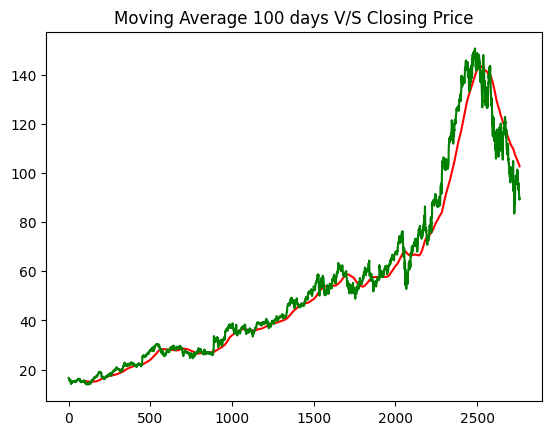

In [31]:
plt.plot(ma_100,'r')
plt.plot(data.Close,'g')
plt.title('Moving Average 100 days V/S Closing Price')
plt.show()

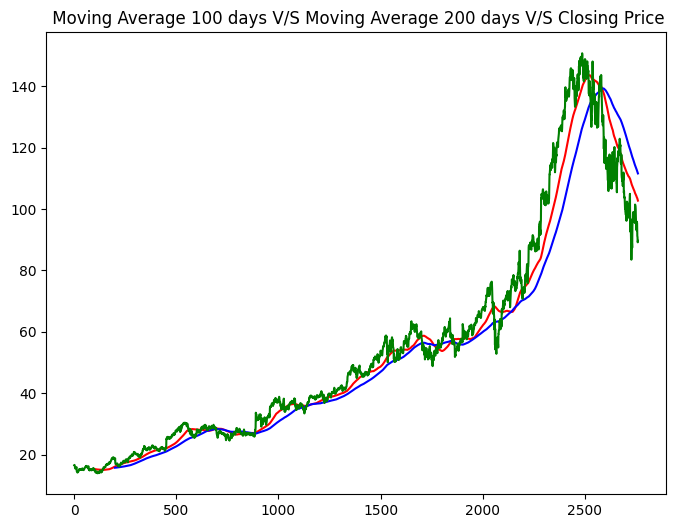

In [32]:
#moving average of 200 days
ma_200=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100,'r')
plt.plot(ma_200,'b')
plt.plot(data.Close,'g')
plt.title(' Moving Average 100 days V/S Moving Average 200 days V/S Closing Price')
plt.show()

In [33]:
#Delete null values or missing values
data.dropna(inplace=True)

In [34]:
#Preprocessing
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [35]:
data_train.shape[0]


2208

In [36]:
data_test.shape[0]

553

In [37]:
#scaling actual stock price to 0's and 1's,.i.e, Slicing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_train_scale=scaler.fit_transform(data_train)

In [38]:
#array slicing of 100days..higher the data higher the accuracy
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [39]:
x,y=np.array(x),np.array(y)

In [40]:
from keras.layers import Dense,Dropout,LSTM 
from keras.models import Sequential

In [ ]:
#return_sequences means output of one layer will become input of another layer
#dropout- if we go with completely only on the training dataset so our model will be fitted too tightly 
#so it will completely relay on the training dataset, 
#so it may not give the accurate result in the practical so that's the reason we are giving the loss of 0.2 

model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
              input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [135]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 [==============================] - 39s 408ms/step - loss: 0.0323
Epoch 2/50
66/66 [==============================] - 26s 392ms/step - loss: 0.0073
Epoch 3/50
66/66 [==============================] - 25s 384ms/step - loss: 0.0065
Epoch 4/50
66/66 [==============================] - 26s 390ms/step - loss: 0.0049
Epoch 5/50
66/66 [==============================] - 26s 397ms/step - loss: 0.0056
Epoch 6/50
66/66 [==============================] - 26s 392ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 26s 389ms/step - loss: 0.0044
Epoch 8/50
66/66 [==============================] - 26s 388ms/step - loss: 0.0041
Epoch 9/50
66/66 [==============================] - 26s 392ms/step - loss: 0.0041
Epoch 10/50
66/66 [==============================] - 26s 398ms/step - loss: 0.0040
Epoch 11/50
66/66 [==============================] - 27s 406ms/step - loss: 0.0038
Epoch 12/50
66/66 [==============================] - 25s 384ms/step - loss: 0.0037
Epoch 13/50
6

In [136]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_10 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_11 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_12 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_13 (LSTM)              (None, 120)              

In [137]:
#predicting 100 to 101th 
#from training dataset 100 days 
past_100_days=data_train.tail(100)
#this is last 100 days data

In [138]:
#test dataset
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [139]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [140]:
#scaling tes data between 0's and 1's
data_test_scale=scaler.fit_transform(data_test)

In [141]:
#array slicing of 100days..higher the data higher the accuracy
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [142]:
y_predict=model.predict(x)

18/18 [==============================] - 3s 122ms/step


In [143]:
y_predict

array([[0.13015616],
       [0.13067959],
       [0.13220036],
       [0.13474959],
       [0.13823164],
       [0.14248437],
       [0.14720109],
       [0.15206046],
       [0.15686056],
       [0.16150719],
       [0.16602495],
       [0.17034787],
       [0.17440617],
       [0.17797524],
       [0.18091975],
       [0.18328235],
       [0.18520498],
       [0.18690588],
       [0.1888161 ],
       [0.1912981 ],
       [0.19462395],
       [0.19896254],
       [0.20425385],
       [0.21031389],
       [0.21684985],
       [0.22355545],
       [0.23014519],
       [0.23634778],
       [0.24188675],
       [0.2465651 ],
       [0.25024682],
       [0.25285217],
       [0.25446665],
       [0.25526378],
       [0.25548655],
       [0.25532657],
       [0.25500804],
       [0.2547929 ],
       [0.25494188],
       [0.2556376 ],
       [0.25692376],
       [0.25869742],
       [0.26076204],
       [0.2629801 ],
       [0.26515836],
       [0.2670623 ],
       [0.26845858],
       [0.269

In [144]:
#converting back to actual price
scale=1/scaler.scale_

In [145]:
y_predict=y_predict*scale

In [146]:
y=y*scale

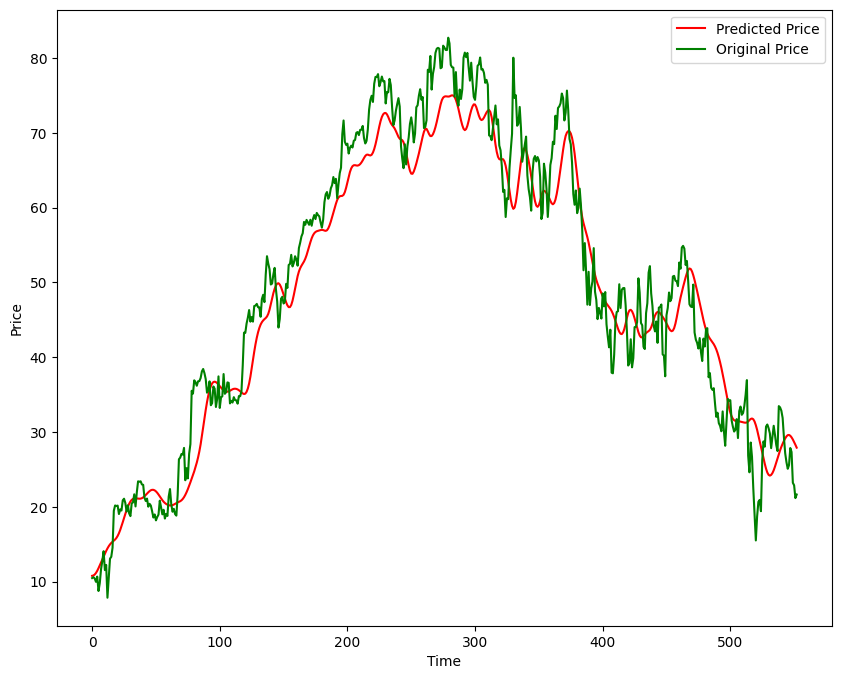

In [147]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [148]:
model.save('Stock Prediction Model Prachi Singh ML.keras')